In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report


from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
expr = pd.read_parquet("C:\\Users\\DELL\\Desktop\\DeepLearning\\mRNA_coding.omics.parquet")
labels = pd.read_parquet("C:\\Users\\DELL\\Desktop\\DeepLearning\\label.parquet")

expr.shape, labels.shape

((9349, 19888), (10374, 9))

In [3]:
expr.head()

,caseID,ENSG00000211895,ENSG00000211896,ENSG00000211897,ENSG00000211898,ENSG00000211899,ENSG00000211677,ENSG00000211679,ENSG00000211685,ENSG00000211890,...,ENSG00000231202,ENSG00000225992,ENSG00000249978,ENSG00000226212,ENSG00000228668,ENSG00000251578,ENSG00000240578,ENSG00000239992,ENSG00000249912,ENSG00000241911
0,TCGA-HQ-A5ND-01A-11R-A26T-07,0.262200,2.843700,0.1289,0.0000,0.199300,0.655800,0.302700,0.0000,0.081500,...,0.0,0.0,0.0660,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
1,TCGA-G2-A3IB-01A-11R-A20F-07,0.323800,0.444600,0.1120,0.0000,0.082000,0.443000,0.110700,0.0000,0.131200,...,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
2,TCGA-ZF-AA5N-01A-11R-A42T-07,396.157990,88.736198,24.3566,0.2993,10.473400,72.044296,33.686199,0.2576,161.064102,...,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
3,TCGA-FD-A6TF-01A-52R-A32O-07,37.804501,894.137695,47.8643,2.5348,54.887402,295.739502,287.434387,1.0701,2.152300,...,0.0,0.0,0.0581,0.0686,0.0,0.0590,0.0,0.0,0.0,0.0
4,TCGA-GC-A3WC-11A-11R-A22U-07,737.350281,132.165497,35.4646,15.9797,84.176102,212.235199,97.084602,0.1685,122.155098,...,0.0,0.0,0.1403,0.0828,0.0,0.1423,0.0,0.0,0.0,0.0


In [4]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9349 entries, 0 to 9348
Columns: 19888 entries, caseID to ENSG00000241911
dtypes: float32(19887), object(1)
memory usage: 709.3+ MB


In [5]:
expr.isnull().sum()

caseID             0
ENSG00000211895    0
ENSG00000211896    0
ENSG00000211897    0
ENSG00000211898    0
                  ..
ENSG00000251578    0
ENSG00000240578    0
ENSG00000239992    0
ENSG00000249912    0
ENSG00000241911    0
Length: 19888, dtype: int64

In [6]:
expr[expr.isnull().any(axis=1)]


,caseID,ENSG00000211895,ENSG00000211896,ENSG00000211897,ENSG00000211898,ENSG00000211899,ENSG00000211677,ENSG00000211679,ENSG00000211685,ENSG00000211890,...,ENSG00000231202,ENSG00000225992,ENSG00000249978,ENSG00000226212,ENSG00000228668,ENSG00000251578,ENSG00000240578,ENSG00000239992,ENSG00000249912,ENSG00000241911


In [7]:
expr['caseID'].value_counts()

caseID
TCGA-HQ-A5ND-01A-11R-A26T-07    1
TCGA-09-1669-01A-01R-1566-13    1
TCGA-24-1416-01A-01R-1565-13    1
TCGA-30-1892-01A-01R-1568-13    1
TCGA-13-0913-01A-01R-1564-13    1
                               ..
TCGA-G6-A8L8-01A-21R-A37O-07    1
TCGA-B8-4154-01A-01R-1188-07    1
TCGA-B0-5698-01A-11R-1672-07    1
TCGA-B0-4828-01A-01R-1277-07    1
TCGA-FL-A1YN-11A-11R-A32Y-07    1
Name: count, Length: 9349, dtype: int64

In [8]:
expr=expr.drop_duplicates()

In [9]:
expr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9349 entries, 0 to 9348
Columns: 19888 entries, caseID to ENSG00000241911
dtypes: float32(19887), object(1)
memory usage: 709.3+ MB


In [10]:
labels.head()

,sampleID,patient,cases,subtype,survival,vital_status,sample_type,cancer_type,surv_class
0,TCGA-BL-A0C8-01A,TCGA-BL-A0C8,mRNA|TCGA-BL-A0C8-01A-11R-A277-07|mRNA_coding|...,BLCA.1,1219.0,0.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS)
1,TCGA-BT-A20N-01A,TCGA-BT-A20N,mRNA|TCGA-BT-A20N-01A-11R-A14Y-07|mRNA_coding|...,BLCA.1,795.0,1.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS)
2,TCGA-BT-A20P-01A,TCGA-BT-A20P,mRNA|TCGA-BT-A20P-01A-11R-A14Y-07|mRNA_coding|...,BLCA.1,544.0,1.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS)
3,TCGA-BT-A3PH-01A,TCGA-BT-A3PH,mRNA|TCGA-BT-A3PH-01A-11R-A220-07|mRNA_coding|...,BLCA.1,142.0,1.0,Tumour,TCGA-BLCA,Short Term Survivor (STS)
4,TCGA-BT-A42C-01A,TCGA-BT-A42C,mRNA|TCGA-BT-A42C-01A-11R-A23N-07|mRNA_coding|...,BLCA.1,873.0,0.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS)


In [11]:
labels[labels.isnull().any(axis=1)]

,sampleID,patient,cases,subtype,survival,vital_status,sample_type,cancer_type,surv_class
5,TCGA-CF-A27C-01A,TCGA-CF-A27C,mRNA|TCGA-CF-A27C-01A-11R-A16R-07|mRNA_coding|...,BLCA.1,425.0,0.0,Tumour,TCGA-BLCA,None
6,TCGA-CF-A3MF-01A,TCGA-CF-A3MF,mRNA|TCGA-CF-A3MF-01A-12R-A21D-07|mRNA_coding|...,BLCA.1,383.0,0.0,Tumour,TCGA-BLCA,None
7,TCGA-CF-A3MG-01A,TCGA-CF-A3MG,mRNA|TCGA-CF-A3MG-01A-11R-A20F-07|mRNA_coding|...,BLCA.1,369.0,0.0,Tumour,TCGA-BLCA,None
8,TCGA-CF-A3MH-01A,TCGA-CF-A3MH,mRNA|TCGA-CF-A3MH-01A-11R-A20F-07|mRNA_coding|...,BLCA.1,398.0,0.0,Tumour,TCGA-BLCA,None
9,TCGA-CF-A3MI-01A,TCGA-CF-A3MI,mRNA|TCGA-CF-A3MI-01A-11R-A20F-07|mRNA_coding|...,BLCA.1,370.0,0.0,Tumour,TCGA-BLCA,None
...,...,...,...,...,...,...,...,...,...
10368,TCGA-FL-A1YQ-11A,TCGA-FL-A1YQ,mRNA|TCGA-FL-A1YQ-11A-11R-A32Y-07|mRNA_coding|...,,NaN,NaN,Normal,Normal,Short Term Survivor (STS)
10369,TCGA-FL-A1YT-11A,TCGA-FL-A1YT,mRNA|TCGA-FL-A1YT-11A-12R-A32Y-07|mRNA_coding|...,,NaN,NaN,Normal,Normal,Short Term Survivor (STS)
10370,TCGA-FL-A1YU-11A,TCGA-FL-A1YU,mRNA|TCGA-FL-A1YU-11A-11R-A32Y-07|mRNA_coding|...,,NaN,NaN,Normal,Normal,Short Term Survivor (STS)
10371,TCGA-FL-A1YV-11A,TCGA-FL-A1YV,mRNA|TCGA-FL-A1YV-11A-12R-A32Y-07|mRNA_coding|...,,NaN,NaN,Normal,Normal,Short Term Survivor (STS)


### Joining the tables by sample ID (case ID - cases)

In [12]:
labels['cases_clean'] = labels['cases'].str.split('|').str[1]

In [13]:
labels.head()

,sampleID,patient,cases,subtype,survival,vital_status,sample_type,cancer_type,surv_class,cases_clean
0,TCGA-BL-A0C8-01A,TCGA-BL-A0C8,mRNA|TCGA-BL-A0C8-01A-11R-A277-07|mRNA_coding|...,BLCA.1,1219.0,0.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS),TCGA-BL-A0C8-01A-11R-A277-07
1,TCGA-BT-A20N-01A,TCGA-BT-A20N,mRNA|TCGA-BT-A20N-01A-11R-A14Y-07|mRNA_coding|...,BLCA.1,795.0,1.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS),TCGA-BT-A20N-01A-11R-A14Y-07
2,TCGA-BT-A20P-01A,TCGA-BT-A20P,mRNA|TCGA-BT-A20P-01A-11R-A14Y-07|mRNA_coding|...,BLCA.1,544.0,1.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS),TCGA-BT-A20P-01A-11R-A14Y-07
3,TCGA-BT-A3PH-01A,TCGA-BT-A3PH,mRNA|TCGA-BT-A3PH-01A-11R-A220-07|mRNA_coding|...,BLCA.1,142.0,1.0,Tumour,TCGA-BLCA,Short Term Survivor (STS),TCGA-BT-A3PH-01A-11R-A220-07
4,TCGA-BT-A42C-01A,TCGA-BT-A42C,mRNA|TCGA-BT-A42C-01A-11R-A23N-07|mRNA_coding|...,BLCA.1,873.0,0.0,Tumour,TCGA-BLCA,Long Term Survivor (LTS),TCGA-BT-A42C-01A-11R-A23N-07


In [14]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10374 entries, 0 to 10373
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sampleID      10374 non-null  object 
 1   patient       10374 non-null  object 
 2   cases         10374 non-null  object 
 3   subtype       10374 non-null  object 
 4   survival      8885 non-null   float32
 5   vital_status  8935 non-null   float32
 6   sample_type   10374 non-null  object 
 7   cancer_type   10374 non-null  object 
 8   surv_class    7337 non-null   object 
 9   cases_clean   10374 non-null  object 
dtypes: float32(2), object(8)
memory usage: 729.6+ KB


In [15]:
labels=labels.drop_duplicates()

In [16]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10374 entries, 0 to 10373
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sampleID      10374 non-null  object 
 1   patient       10374 non-null  object 
 2   cases         10374 non-null  object 
 3   subtype       10374 non-null  object 
 4   survival      8885 non-null   float32
 5   vital_status  8935 non-null   float32
 6   sample_type   10374 non-null  object 
 7   cancer_type   10374 non-null  object 
 8   surv_class    7337 non-null   object 
 9   cases_clean   10374 non-null  object 
dtypes: float32(2), object(8)
memory usage: 729.6+ KB


In [17]:
expr['caseID'] = expr['caseID'].str.strip()
labels['cases'] = labels['cases_clean'].str.strip()

# set(expr['caseID']).intersection(labels['cases_clean'])

In [18]:
common_ids = set(expr['caseID']).intersection(set(labels['cases']))
len(common_ids)

9349

In [19]:
df = expr.merge(labels, left_on='caseID', right_on='cases_clean', how='left')

In [20]:
df.head()

,caseID,ENSG00000211895,ENSG00000211896,ENSG00000211897,ENSG00000211898,ENSG00000211899,ENSG00000211677,ENSG00000211679,ENSG00000211685,ENSG00000211890,...,sampleID,patient,cases,subtype,survival,vital_status,sample_type,cancer_type,surv_class,cases_clean
0,TCGA-HQ-A5ND-01A-11R-A26T-07,0.262200,2.843700,0.1289,0.0000,0.199300,0.655800,0.302700,0.0000,0.081500,...,TCGA-HQ-A5ND-01A,TCGA-HQ-A5ND,TCGA-HQ-A5ND-01A-11R-A26T-07,,274.0,1.0,Tumour,TCGA-BLCA,Short Term Survivor (STS),TCGA-HQ-A5ND-01A-11R-A26T-07
1,TCGA-G2-A3IB-01A-11R-A20F-07,0.323800,0.444600,0.1120,0.0000,0.082000,0.443000,0.110700,0.0000,0.131200,...,TCGA-G2-A3IB-01A,TCGA-G2-A3IB,TCGA-G2-A3IB-01A-11R-A20F-07,BLCA.3,220.0,1.0,Tumour,TCGA-BLCA,Short Term Survivor (STS),TCGA-G2-A3IB-01A-11R-A20F-07
2,TCGA-ZF-AA5N-01A-11R-A42T-07,396.157990,88.736198,24.3566,0.2993,10.473400,72.044296,33.686199,0.2576,161.064102,...,TCGA-ZF-AA5N-01A,TCGA-ZF-AA5N,TCGA-ZF-AA5N-01A-11R-A42T-07,,168.0,1.0,Tumour,TCGA-BLCA,Short Term Survivor (STS),TCGA-ZF-AA5N-01A-11R-A42T-07
3,TCGA-FD-A6TF-01A-52R-A32O-07,37.804501,894.137695,47.8643,2.5348,54.887402,295.739502,287.434387,1.0701,2.152300,...,TCGA-FD-A6TF-01A,TCGA-FD-A6TF,TCGA-FD-A6TF-01A-52R-A32O-07,,69.0,1.0,Tumour,TCGA-BLCA,Short Term Survivor (STS),TCGA-FD-A6TF-01A-52R-A32O-07
4,TCGA-GC-A3WC-11A-11R-A22U-07,737.350281,132.165497,35.4646,15.9797,84.176102,212.235199,97.084602,0.1685,122.155098,...,TCGA-GC-A3WC-11A,TCGA-GC-A3WC,TCGA-GC-A3WC-11A-11R-A22U-07,,NaN,NaN,Normal,Normal,Short Term Survivor (STS),TCGA-GC-A3WC-11A-11R-A22U-07


In [21]:
df.shape

(9349, 19898)

In [22]:
df["cancer_type"].value_counts().head(10)

cancer_type
TCGA-BRCA    1101
Normal        669
TCGA-UCEC     546
TCGA-KIRC     534
TCGA-LGG      534
TCGA-HNSC     522
TCGA-LUAD     518
TCGA-THCA     513
TCGA-LUSC     501
TCGA-PRAD     498
Name: count, dtype: int64

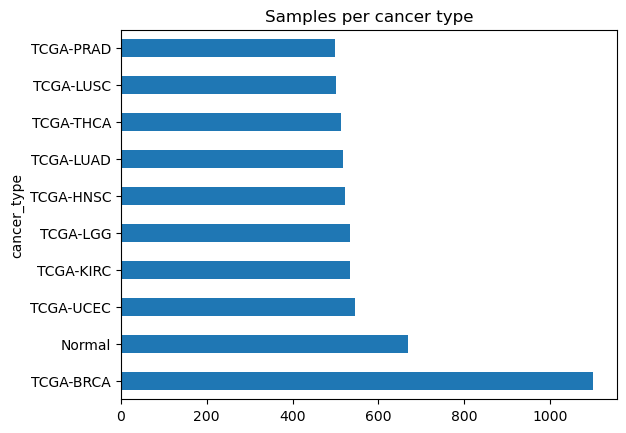

In [23]:
import matplotlib.pyplot as plt
df["cancer_type"].value_counts().head(10).plot(kind='barh')
plt.title("Samples per cancer type")
plt.show()

In [24]:
df["sample_type"].value_counts().head(10)

sample_type
Tumour    8680
Normal     669
Name: count, dtype: int64

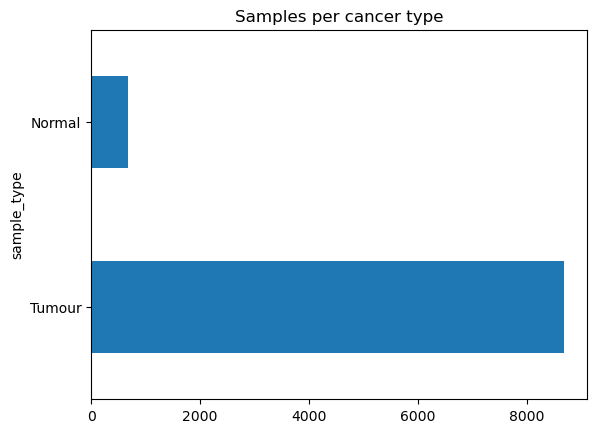

In [25]:
df["sample_type"].value_counts().head(10).plot(kind='barh')
plt.title("Samples per cancer type")
plt.show()

In [26]:
# select only gene columns
gene_cols = [c for c in df.columns if str(c).startswith("ENSG")]

X_df = df[gene_cols].copy()

# convert to a numeric type
X_df = X_df.apply(pd.to_numeric) #errors="coerce" for NaN
X_df.head()

,ENSG00000211895,ENSG00000211896,ENSG00000211897,ENSG00000211898,ENSG00000211899,ENSG00000211677,ENSG00000211679,ENSG00000211685,ENSG00000211890,ENSG00000211891,...,ENSG00000231202,ENSG00000225992,ENSG00000249978,ENSG00000226212,ENSG00000228668,ENSG00000251578,ENSG00000240578,ENSG00000239992,ENSG00000249912,ENSG00000241911
0,0.262200,2.843700,0.1289,0.0000,0.199300,0.655800,0.302700,0.0000,0.081500,0.0000,...,0.0,0.0,0.0660,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
1,0.323800,0.444600,0.1120,0.0000,0.082000,0.443000,0.110700,0.0000,0.131200,0.4321,...,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
2,396.157990,88.736198,24.3566,0.2993,10.473400,72.044296,33.686199,0.2576,161.064102,5.4412,...,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0
3,37.804501,894.137695,47.8643,2.5348,54.887402,295.739502,287.434387,1.0701,2.152300,0.1522,...,0.0,0.0,0.0581,0.0686,0.0,0.0590,0.0,0.0,0.0,0.0
4,737.350281,132.165497,35.4646,15.9797,84.176102,212.235199,97.084602,0.1685,122.155098,0.3827,...,0.0,0.0,0.1403,0.0828,0.0,0.1423,0.0,0.0,0.0,0.0


In [27]:
print(X_df.shape, X_df.dtypes.unique())

(9349, 19887) [dtype('float32')]


### Building visualization graphs

### To conctract the PCA, use genes with the greatest dispertion

Instead of using all genes, first select a subset with the highest variance (top-variance genes).

Reasons:
- Most genes show very little variation between samples and mainly contribute noise.
- PCA looks for directions of maximal variance; if we include thousands of almost constant genes, principal components will reflect technical noise rather than biology.
- Using 500–2000 most variable genes makes the analysis faster and usually produces cleaner, more interpretable clusters.

In [28]:
expr_genes = X_df    # keep only gene expression data

# list of different top-k values you want to test
top_k_list = [500, 1000, 2000]

gene_variance = X_df.var(axis=0)   # variance for each gene

# dictionary to store results for each k
expr_top_dict = {}

for k in top_k_list:
    top_genes = gene_variance.sort_values(ascending=False).head(k).index  # choose top k genes
    expr_top_dict[k] = expr_genes[top_genes]  # save subset
    print(f"\nTop {k} genes:")
    display(expr_top_dict[k].head())



Top 500 genes:


,ENSG00000211592,ENSG00000198938,ENSG00000198804,ENSG00000198712,ENSG00000198886,ENSG00000198727,ENSG00000163631,ENSG00000198840,ENSG00000198899,ENSG00000087086,...,ENSG00000107796,ENSG00000067225,ENSG00000145425,ENSG00000130300,ENSG00000167779,ENSG00000111245,ENSG00000125968,ENSG00000044574,ENSG00000109971,ENSG00000104760
0,7.263900,6254.351074,4183.770996,7311.637207,5961.823242,1825.769409,0.0204,1391.937744,2822.819092,2037.051758,...,16.524599,455.453491,87.809196,10.510900,44.552898,1.6777,60.544601,362.297607,274.720490,0.0000
1,3.423800,5312.990234,4127.478027,3404.447021,4672.598145,2025.632690,0.0050,1619.319946,2369.673340,4993.446777,...,5.449600,459.162598,41.804199,10.076200,141.929001,0.0120,127.592102,189.779205,208.003998,0.0052
2,985.030090,2786.794189,1683.649780,3936.266357,2054.300781,1209.514160,0.0000,1965.818115,1686.801025,1721.524658,...,2.652900,260.319092,178.818497,15.517800,3.164900,0.8017,36.115799,269.728394,505.935394,0.0000
3,1948.536377,9616.743164,6843.346191,11305.067383,7926.274414,2964.621826,0.0419,4579.979004,4832.295898,2499.751465,...,188.539902,211.323898,120.977203,83.602203,30.747000,0.0145,18.172001,154.481506,165.568497,0.0186
4,1814.812256,10256.993164,11541.290039,8729.797852,6924.163574,5551.808105,0.0577,4992.560547,4551.459473,3400.874023,...,732.624695,106.491600,117.882401,50.203098,75.423500,0.0350,131.186905,77.067703,170.335205,0.0075



Top 1000 genes:


,ENSG00000211592,ENSG00000198938,ENSG00000198804,ENSG00000198712,ENSG00000198886,ENSG00000198727,ENSG00000163631,ENSG00000198840,ENSG00000198899,ENSG00000087086,...,ENSG00000111897,ENSG00000105664,ENSG00000143621,ENSG00000086062,ENSG00000107159,ENSG00000132698,ENSG00000006327,ENSG00000131094,ENSG00000047457,ENSG00000177156
0,7.263900,6254.351074,4183.770996,7311.637207,5961.823242,1825.769409,0.0204,1391.937744,2822.819092,2037.051758,...,51.438900,1.243700,131.861893,39.239700,63.934101,65.670097,73.142502,0.1221,14.2767,84.022903
1,3.423800,5312.990234,4127.478027,3404.447021,4672.598145,2025.632690,0.0050,1619.319946,2369.673340,4993.446777,...,44.661800,0.297800,87.282700,22.815001,14.752400,127.504501,44.542500,0.3462,2.5754,299.194885
2,985.030090,2786.794189,1683.649780,3936.266357,2054.300781,1209.514160,0.0000,1965.818115,1686.801025,1721.524658,...,27.609100,0.091800,90.135498,24.049299,3.744200,179.982498,114.198097,0.0744,2.7950,148.163101
3,1948.536377,9616.743164,6843.346191,11305.067383,7926.274414,2964.621826,0.0419,4579.979004,4832.295898,2499.751465,...,52.763302,102.505402,142.993195,33.597900,1.939500,181.931702,99.777702,0.1209,0.2698,99.267303
4,1814.812256,10256.993164,11541.290039,8729.797852,6924.163574,5551.808105,0.0577,4992.560547,4551.459473,3400.874023,...,92.830803,3.732700,40.562698,22.870001,1.494000,34.752998,14.975700,0.7137,5.8591,40.903500



Top 2000 genes:


,ENSG00000211592,ENSG00000198938,ENSG00000198804,ENSG00000198712,ENSG00000198886,ENSG00000198727,ENSG00000163631,ENSG00000198840,ENSG00000198899,ENSG00000087086,...,ENSG00000135218,ENSG00000014216,ENSG00000131620,ENSG00000132819,ENSG00000107317,ENSG00000162817,ENSG00000184076,ENSG00000115677,ENSG00000084733,ENSG00000151552
0,7.263900,6254.351074,4183.770996,7311.637207,5961.823242,1825.769409,0.0204,1391.937744,2822.819092,2037.051758,...,0.1457,134.701508,117.578796,8.1059,0.0258,4.8855,21.203199,33.334801,72.273903,12.8594
1,3.423800,5312.990234,4127.478027,3404.447021,4672.598145,2025.632690,0.0050,1619.319946,2369.673340,4993.446777,...,2.2446,139.885895,112.145302,15.1505,0.0126,1.4039,28.492901,50.956600,104.329498,2.3158
2,985.030090,2786.794189,1683.649780,3936.266357,2054.300781,1209.514160,0.0000,1965.818115,1686.801025,1721.524658,...,0.1723,88.074699,0.330200,23.7138,0.0628,4.5777,35.011700,97.782799,41.596901,5.9533
3,1948.536377,9616.743164,6843.346191,11305.067383,7926.274414,2964.621826,0.0419,4579.979004,4832.295898,2499.751465,...,6.2630,95.331299,9.821300,16.5623,1.3845,6.4799,20.855101,35.802502,42.681999,11.8146
4,1814.812256,10256.993164,11541.290039,8729.797852,6924.163574,5551.808105,0.0577,4992.560547,4551.459473,3400.874023,...,6.5674,31.323400,1.427400,29.1474,1.6164,6.6822,17.806900,41.344200,37.387798,8.7183


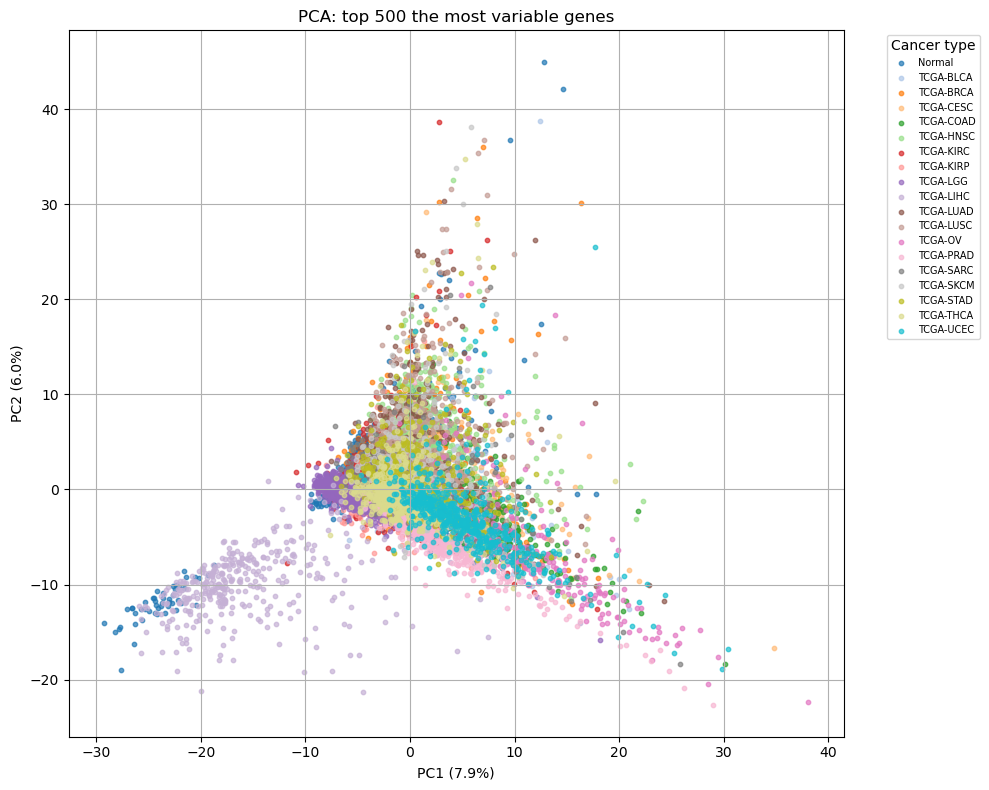

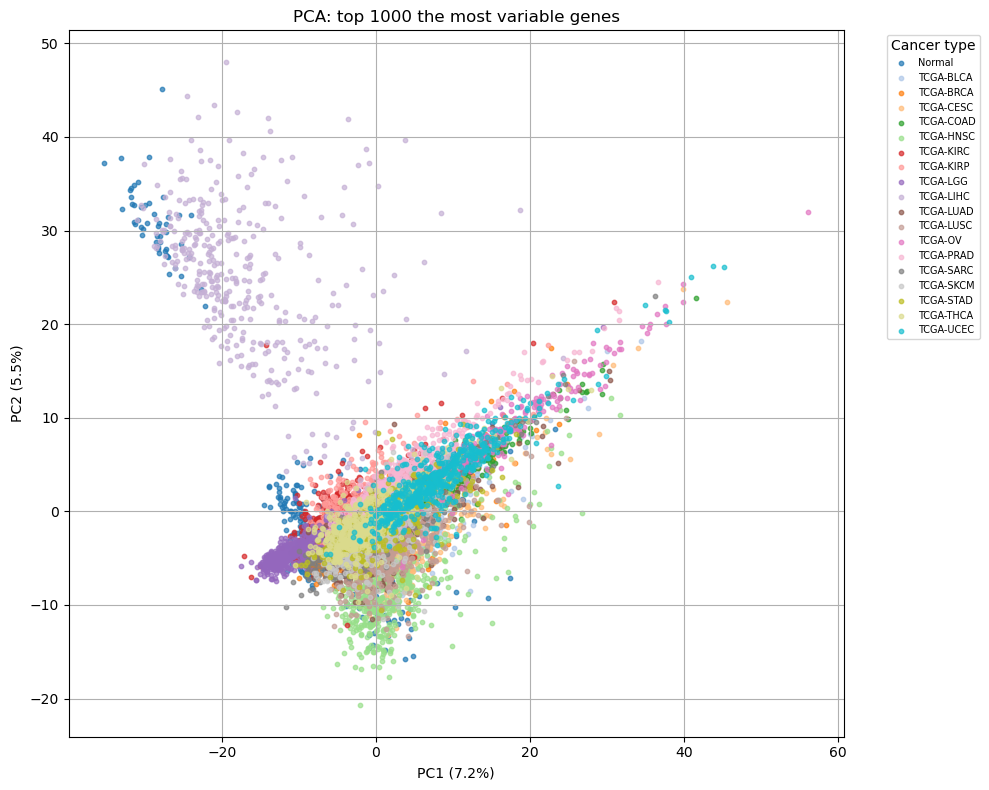

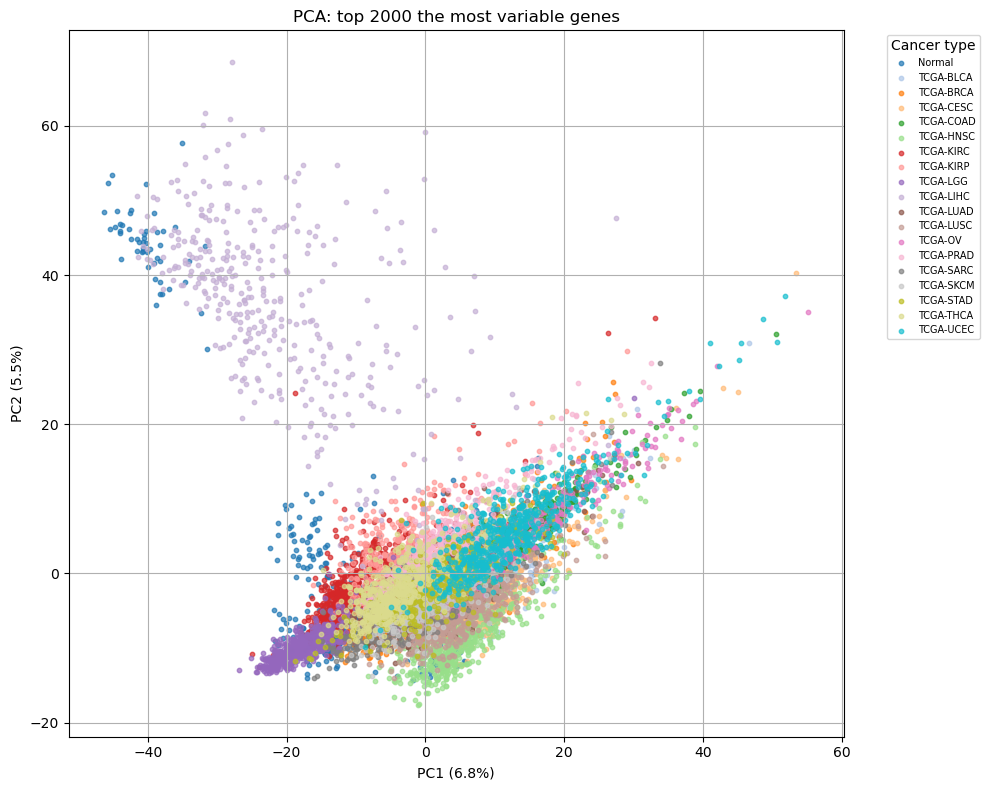

In [29]:
# select class labels (for example, cancer type)
y = df["cancer_type"].astype("category") 

pca_results = {}

for top_k_list, X_top in expr_top_dict.items():
    # standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_top)

    # PCA
    pca = PCA(n_components=10)
    X_pca = pca.fit_transform(X_scaled)

    pca_results[top_k_list] = {
        "pca": pca,
        "X_pca": X_pca
    }

    # 2D scatter PC1 vs PC2
    plt.figure(figsize=(10, 8))
    

    categories = y.cat.categories
    codes = y.cat.codes

    cmap = plt.cm.tab20  # до 20 групп

    for i, cat in enumerate(categories):
        mask = (y == cat)
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            s=10,
            color=cmap(i / len(categories)),
            label=str(cat),
            alpha=0.7
        )

    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title(f"PCA: top {top_k_list} the most variable genes")

    plt.legend(
        title="Cancer type",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        fontsize=7
    )

    plt.grid(True)
    plt.tight_layout()
    plt.show()


PCA performed on the most variable genes shows that:

- When using the top 500 - 1000 genes, the first two components already explain a substantial fraction of variance (typically tens of percent).
  
- Samples form clusters that largely correspond to cancer types (`cancer_type`), indicating that gene expression profiles carry a strong biological signal.

- Increasing the number of genes to 2000 does not drastically change the cluster structure, which suggests that the results are stable. If adding many more genes makes clusters more diffuse, this usually indicates that low-variance genes introduce noise rather than useful information into PCA.

PCA analysis based on the most variable genes reveals both pronounced tissue-specific separation and substantial intra-tumor heterogeneity across TCGA samples.

Several key patterns are observed:

- Well-separated clusters. Certain cancer types form clearly distinct clusters. For example, brain tumors (TCGA-LGG/GBM) are strongly separated from other cancers, reflecting their unique transcriptional signatures.

- Mixed or overlapping clusters. Many tumor types form dense, overlapping clouds in the PCA center, indicating strong similarity in transcriptional programs among different tissues. Such overlap often reflects shared characteristics such as proliferation, stromal composition, or immune activity.

- Tissue-specific “branches.” Some cancer types (e.g., lung, liver, thyroid) form directional, elongated PCA branches. This suggests strong tissue-driven expression patterns - metabolic, immune, or structural.

Low explained variance (5-7%). This is typical for bulk RNA-seq data, where biological variability is distributed across thousands of genes. The first components capture only a fraction of the total heterogeneity.

Heterogeneity within the same cancer type. Several tumor types (BRCA, LUAD, HNSC) show wide spread along PCA axes, reflecting:

- molecular subtypes,

- immune infiltration differences,

- differentiation states,

- potential batch effects.

### Plot the cumulative explained variance to estimate how many components are needed to capture most of the variation.

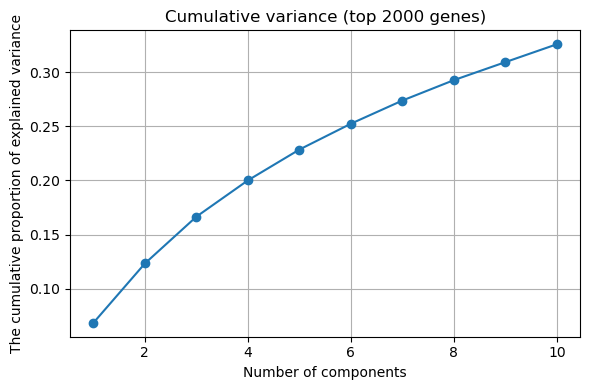

In [30]:
 # cumulative explained variance plot
plt.figure(figsize=(6, 4))
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker="o")
plt.xlabel("Number of components")
plt.ylabel("The cumulative proportion of explained variance")
plt.title(f"Cumulative variance (top {top_k_list} genes)")
plt.grid(True)
plt.tight_layout()
plt.show()

Ten components explain only ~0.33 (33%) of the data variation. The contribution grows slowly. The curve does not plateau.

This is a sign of very high-dimensional data with significant noise. This is completely normal for the TCGA-RNA data.

In [31]:
#  top-2000 genes
X_top = expr_top_dict[2000] 

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# PCA 100 components
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Shape PCA:", X_pca.shape)

Shape PCA: (9349, 100)


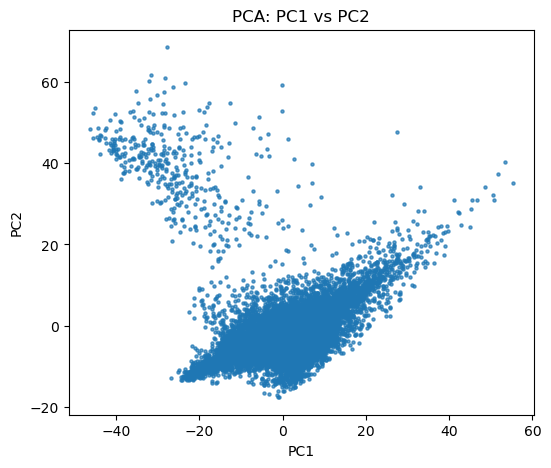

In [32]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: PC1 vs PC2")
plt.show()

In [33]:
pca_full = PCA(n_components=300)
pca_full.fit(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = explained.cumsum()

In [34]:
def find_knee(cum_var):
    import numpy as np

    x = np.arange(1, len(cum_var)+1)
    y = cum_var

    # line between the first and last point
    
    # line between the first and last point
    line = np.linspace(y[0], y[-1], len(y))

    # distance to the line
    dist = y - line

    # the point of maximum deviation is the knee
    return np.argmax(dist) + 1

In [35]:
knee_k = find_knee(cum_explained)
knee_k

50

In [36]:
def components_for_variance(cum_var, threshold=0.8):
    return np.argmax(cum_var >= threshold) + 1

In [37]:
k_70 = components_for_variance(cum_explained, 0.70)
k_80 = components_for_variance(cum_explained, 0.80)
k_90 = components_for_variance(cum_explained, 0.90)
k_70, k_80, k_90

(174, 1, 1)

In [38]:
print("Knee method:", knee_k)

print("70% dispersion:", k_70)
print("80% dispersion:", k_80)
print("90% dispersion:", k_90)

Knee method: 50
70% dispersion: 174
80% dispersion: 1
90% dispersion: 1


In [39]:
n_components_tSNE  = 50
n_components_UMAP  = 50

In [40]:
top_k_for_main = 2000
X_top = expr_top_dict[top_k_for_main]

pca_tsne = PCA(n_components=50)
X_pca_50 = pca_tsne.fit_transform(X_scaled)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    random_state=0
)

X_tsne = tsne.fit_transform(X_pca_50)

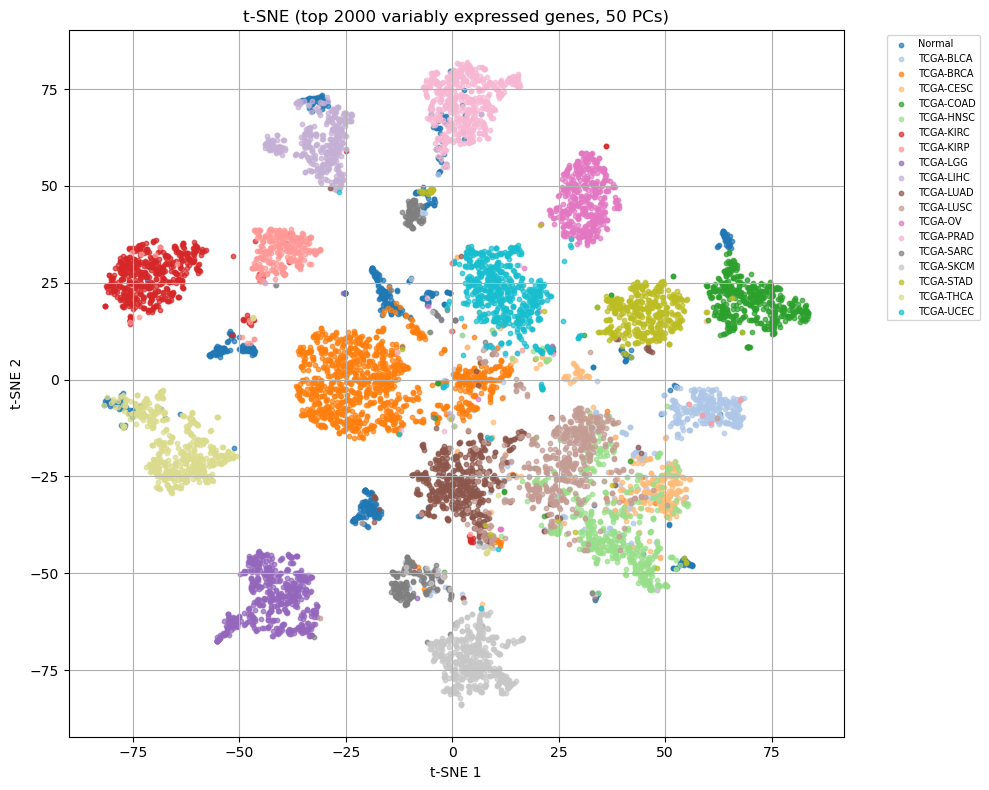

In [41]:
# labels
y_type = df["cancer_type"].astype("category")     # Cancer type
y_sample = df.get("sample_type", None)           # Tumor / Normal
sample_ids = X_top.index

plt.figure(figsize=(10, 8))
cats = y_type.cat.categories
cmap = plt.cm.tab20

for i, cat in enumerate(cats):
    mask = (y_type == cat)
    plt.scatter(
        X_tsne[mask, 0],
        X_tsne[mask, 1],
        s=10,
        color=cmap(i / len(cats)),
        label=str(cat),
        alpha=0.7
    )

plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title(f"t-SNE (top {top_k_for_main} variably expressed genes, 50 PCs)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


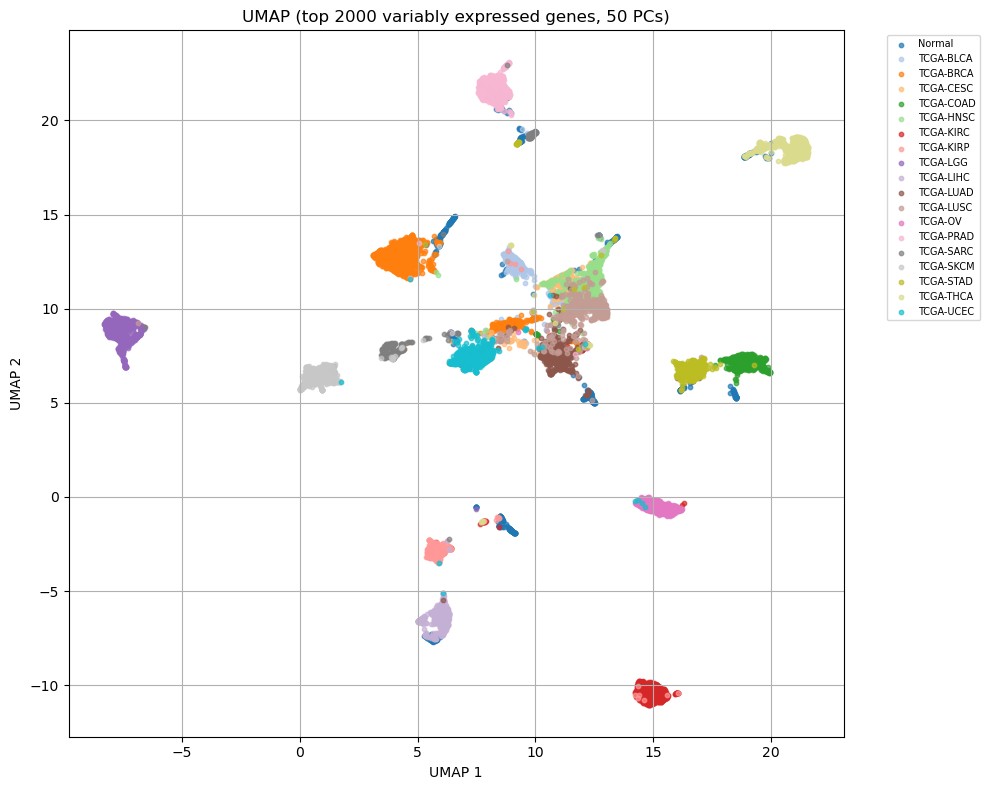

In [42]:
pca_umap = PCA(n_components=50, random_state=42)
X_pca_50u = pca_umap.fit_transform(X_scaled)

reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="euclidean",
    random_state=0
)
X_umap = reducer.fit_transform(X_pca_50u)

plt.figure(figsize=(10, 8))
for i, cat in enumerate(cats):
    mask = (y_type == cat)
    plt.scatter(
        X_umap[mask, 0],
        X_umap[mask, 1],
        s=10,
        color=cmap(i / len(cats)),
        label=str(cat),
        alpha=0.7
    )

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP (top {top_k_for_main} variably expressed genes, 50 PCs)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def plot_tsne_umap_for_type(cancer_code, n_pcs=30):
    mask = (y_type == cancer_code)
    X_sub = X_top[mask]
    y_sub = y_type[mask]

    scaler = StandardScaler()
    X_sub_scaled = scaler.fit_transform(X_sub)

    pca_sub = PCA(n_components=n_pcs)
    X_sub_pca = pca_sub.fit_transform(X_sub_scaled)

    # t-SNE
    tsne_sub = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate='auto',
        init='pca',
        random_state=0
    )
    X_sub_tsne = tsne_sub.fit_transform(X_sub_pca)

     # UMAP
    reducer_sub = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        metric="euclidean",
        random_state=0
    )
    X_sub_umap = reducer_sub.fit_transform(X_sub_pca)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X_sub_tsne[:, 0], X_sub_tsne[:, 1], s=10, alpha=0.8)
    plt.title(f"{cancer_code} – t-SNE")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2"); plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(X_sub_umap[:, 0], X_sub_umap[:, 1], s=10, alpha=0.8)
    plt.title(f"{cancer_code} – UMAP")
    plt.xlabel("UMAP 1"); plt.ylabel("UMAP 2"); plt.grid(True)

    plt.tight_layout()
    plt.show()

# example
plot_tsne_umap_for_type("TCGA-BRCA")

C:\Users\DELL\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Both methods show heterogeneity in the TCGA-BRCA data.
The samples do not form a single cloud; several groups are present.

This is consistent with the fact that:

BRCA has subtypes:

- Luminal A
- Luminal B
- HER2-enriched
- Basal-like
- Normal-like

Although we do not see cluster signatures, it is visually noticeable that the data is clustered, which is typical for BRCA.

In [ ]:
n_clusters = 15  

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
clusters = kmeans.fit_predict(X_pca_50)

df["kmeans_cluster"] = clusters

plt.figure(figsize=(10, 8))
for cl in range(n_clusters):
    mask = (clusters == cl)
    plt.scatter(
        X_umap[mask, 0],
        X_umap[mask, 1],
        s=10,
        alpha=0.7,
        label=f"Cl {cl}"
    )

plt.xlabel("UMAP 1"); plt.ylabel("UMAP 2")
plt.title("UMAP colored by k-means clusters")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=7)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

umap_df = pd.DataFrame({
    "UMAP1": X_umap[:, 0],
    "UMAP2": X_umap[:, 1],
    "cancer_type": y_type.values,
    "sample_type": y_sample.values if y_sample is not None else None,
    "sample_id": sample_ids
})

fig = px.scatter(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    color="cancer_type",
    hover_name="sample_id",
    hover_data=["cancer_type", "sample_type"],
    title=f"UMAP (interactive, top {top_k_for_main} genes, 50 PCs)",
    width=900,
    height=700
)
fig.show()